In [1]:
# 1.Introduction
# In this notebook, we will explore a dataset of over 2,000 rows
# The goal is to practice data analytics using python and creat a clean - project
# We will clean the data, perform EDA and generate insight!

In [55]:
# imnport libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [56]:
# setting
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [57]:
# Load dataset
df = pd.read_csv("/content/Books.csv")

In [58]:
df.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2049 non-null   object
 1   author          2049 non-null   object
 2   pages           2049 non-null   object
 3   genre           2049 non-null   object
 4   description     2049 non-null   object
 5   published_date  2049 non-null   object
 6   publisher       2049 non-null   object
 7   language        2049 non-null   object
 8   average_rating  2049 non-null   object
 9   ratings_count   2049 non-null   int64 
 10  thumbnail       2049 non-null   object
dtypes: int64(1), object(10)
memory usage: 176.2+ KB


In [60]:
# Initial cleaning
# convert pages to numeric
df['pages'] = pd.to_numeric(df['pages'], errors = 'coerce')

In [61]:
# clean 'average_rating'
df = df[df['average_rating'] != 'No rating']
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')


In [65]:
# Extract the year from the published_date and convert to number from 1950-2025

df['year'] = df['published_date'].str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce')


In [66]:
df = df[(df['year'] >= 1950) & (df['year'] <= 2025)]

In [67]:
# Count the number of books published each year and rank them by year
book_per_year = df['year'].value_counts().sort_index()
book_per_year.head()

,count
year,
1950.0,2
1956.0,1
1962.0,1
1965.0,1
1970.0,2


In [68]:
min_year = book_per_year.idxmin()
min_books = book_per_year.min()
print(f"Year with the fewest books: {min_year} ({min_books} books)")

max_year = book_per_year.idxmax()
max_books = book_per_year.max()
print(f"Year with the maximum books: {max_year} ({max_books} books)")

Year with the fewest books: 1956.0 (1 books)
Year with the maximum books: 2010.0 (20 books)


In [69]:
# convert 'published_date' to datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [70]:
df['published_date']

,published_date
12,2014-04-08
42,NaT
43,NaT
50,NaT
53,NaT
...,...
2044,2016-01-05
2045,2001-04-01
2046,2004-12-28
2047,1999-03-01


In [71]:
#check Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
title               0
author              0
pages               0
genre               0
description         0
published_date    100
publisher           0
language            0
average_rating      0
ratings_count       0
thumbnail           0
year                0
dtype: int64


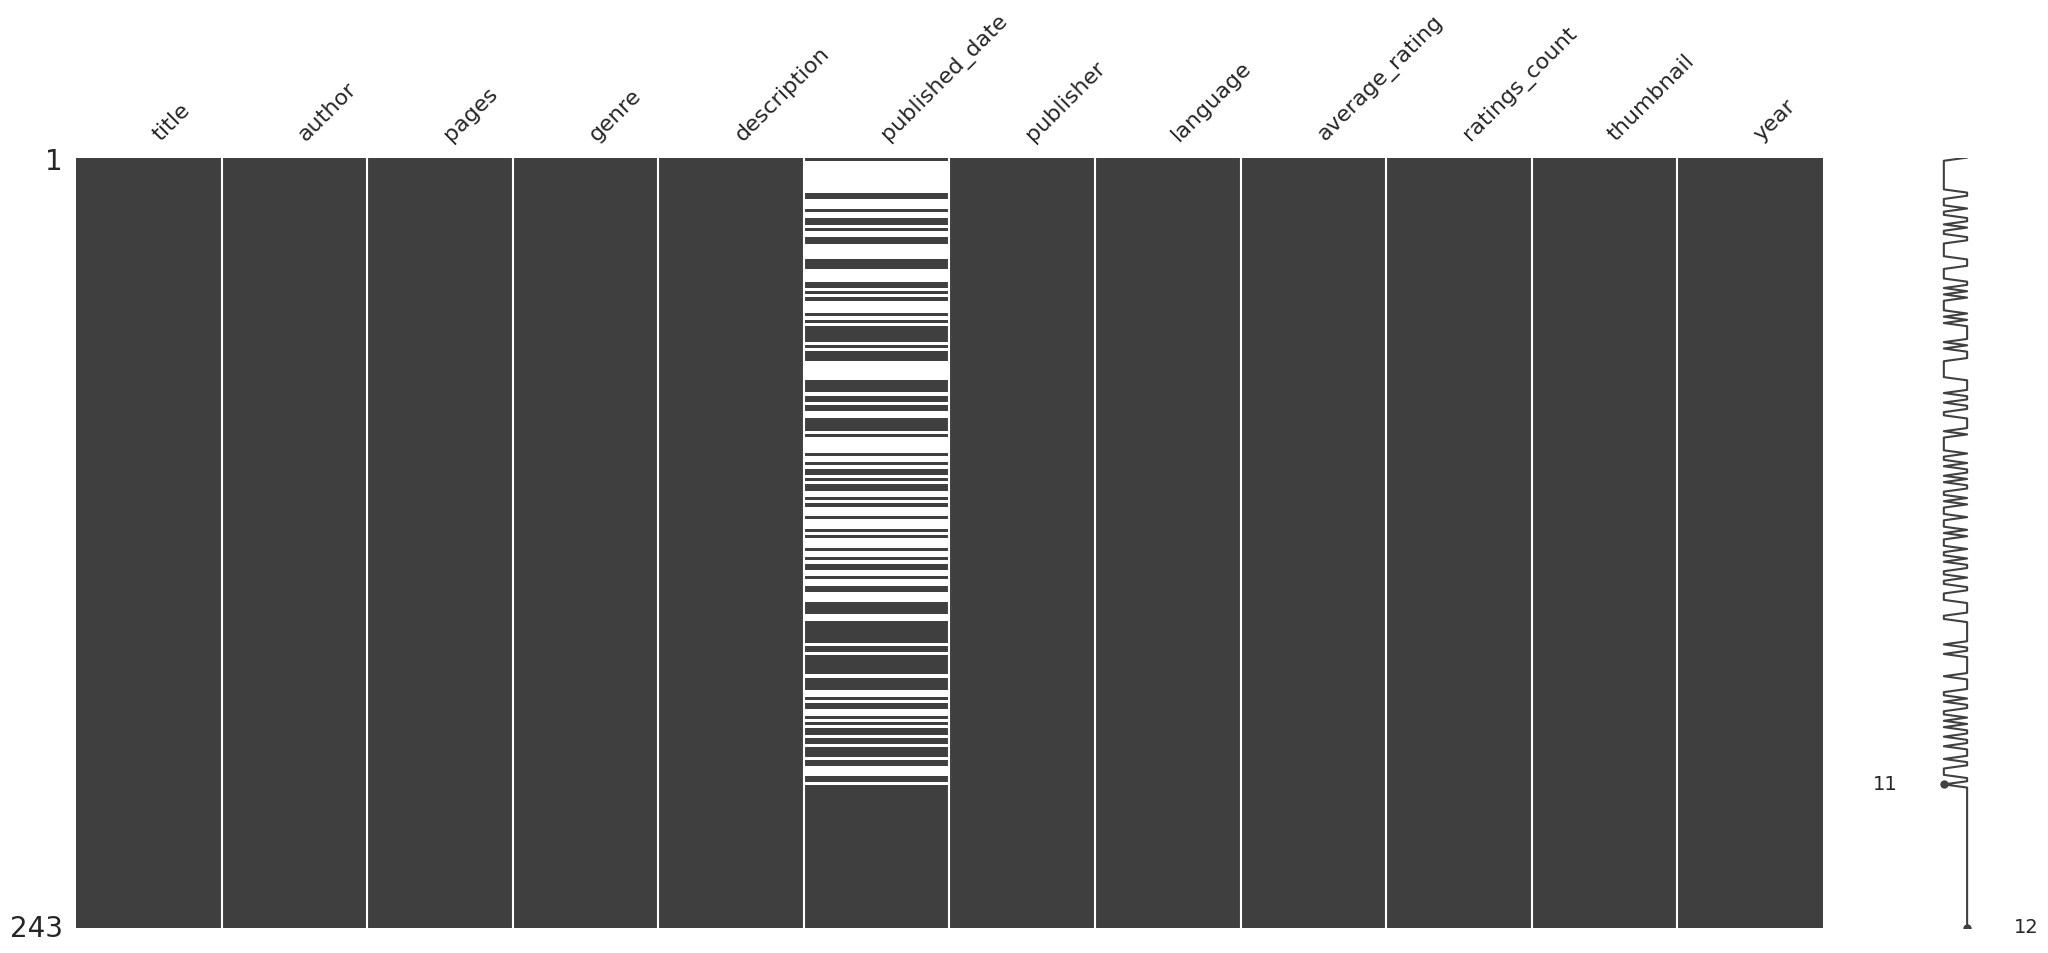

In [72]:
# check missing data
msno.matrix(df)
plt.show()

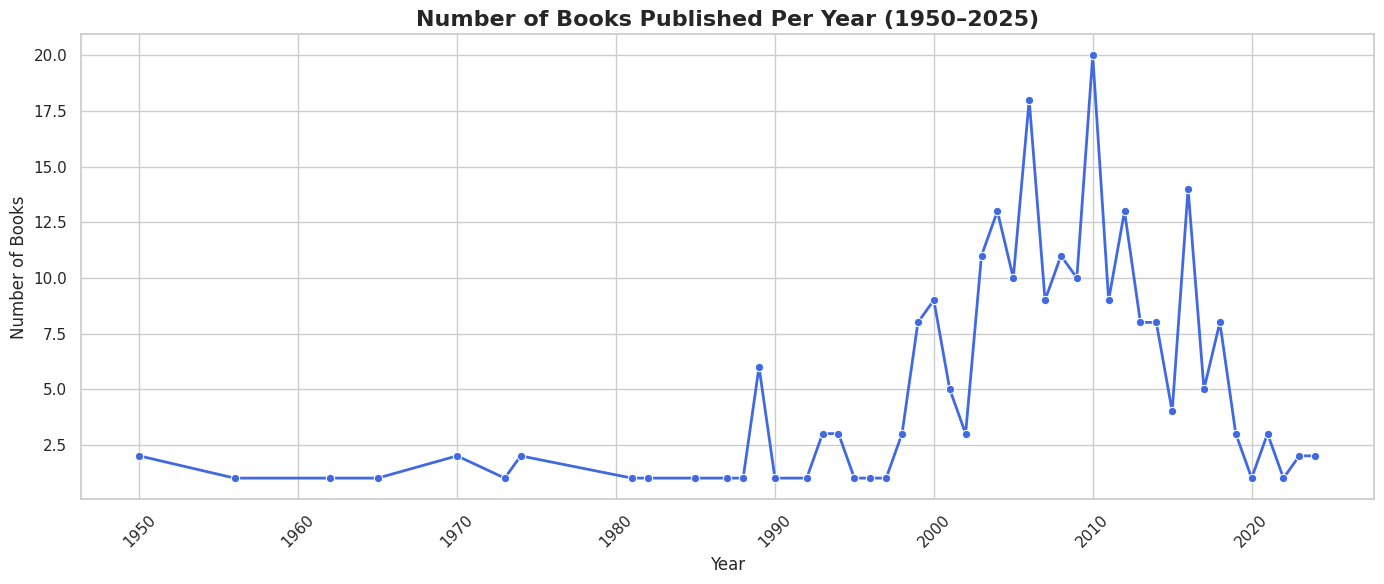

In [73]:
# (Books Published per Year)
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.lineplot(x=book_per_year.index, y=book_per_year.values, marker='o', linewidth=2, color='royalblue')

plt.title('Number of Books Published Per Year (1950–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


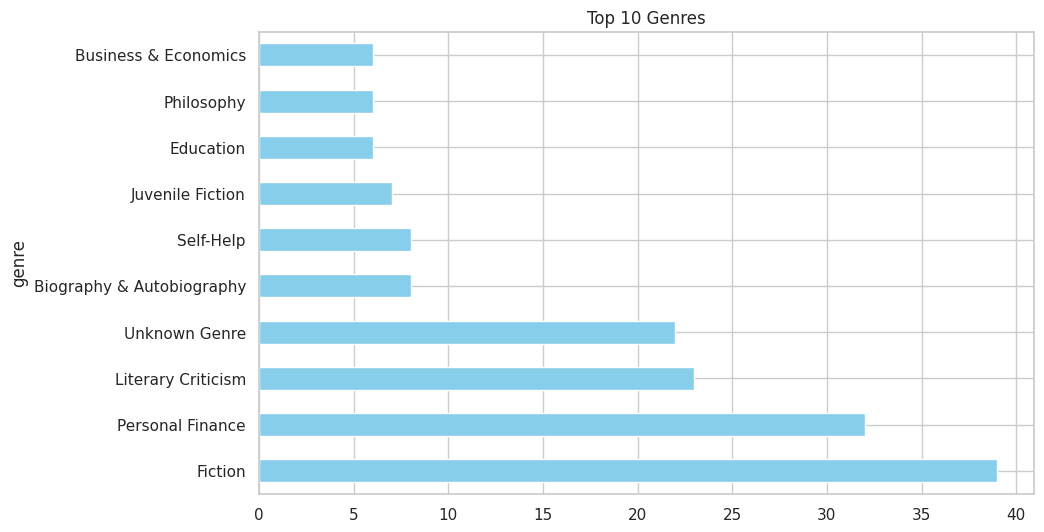

In [74]:
# (Top Genres)
top_genres = df['genre'].value_counts().head(10)
top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres')
plt.show()

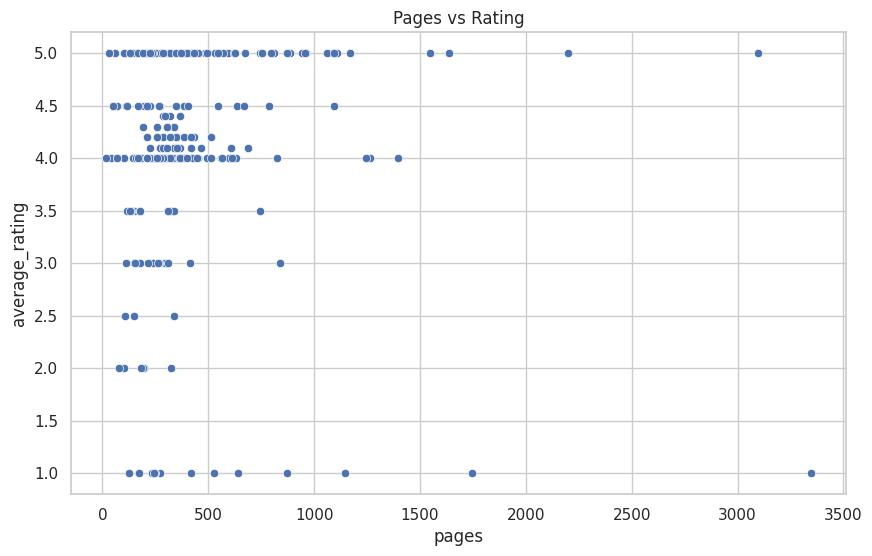

In [75]:
sns.scatterplot(data=df, x='pages', y='average_rating')
plt.title("Pages vs Rating")
plt.show()

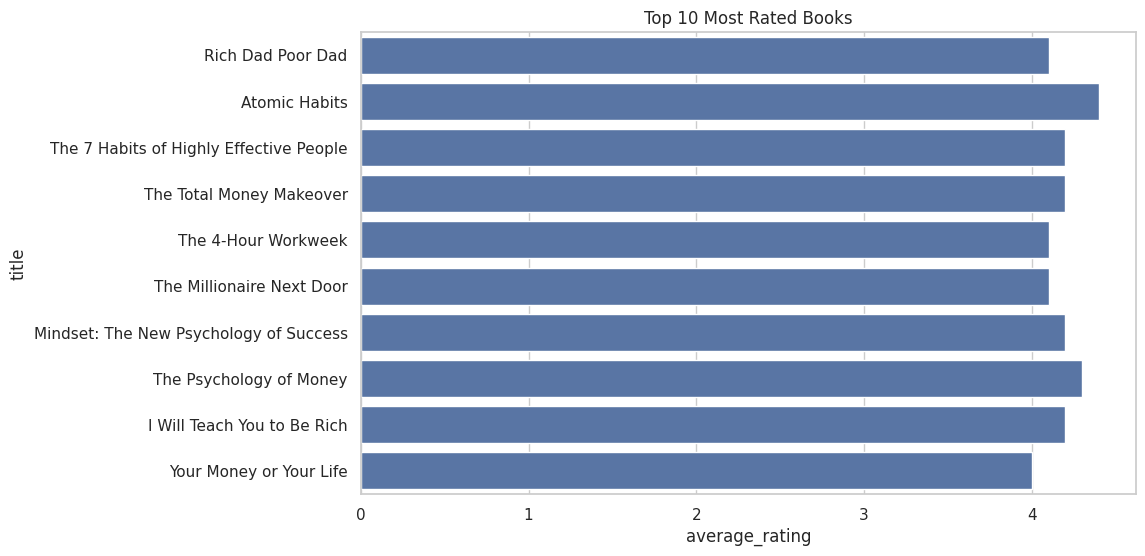

In [76]:
# หนังสือยอดนิยม (Top 10 Rated by ratings_count)
top_books = df.sort_values(by='ratings_count', ascending=False).head(10)
sns.barplot(x='average_rating', y='title', data=top_books)
plt.title('Top 10 Most Rated Books')
plt.show()